In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(data.shape)
print("------------------------------")
print(data.describe())

(614, 13)
------------------------------
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
refurbished_data = data.dropna()
refurbished_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

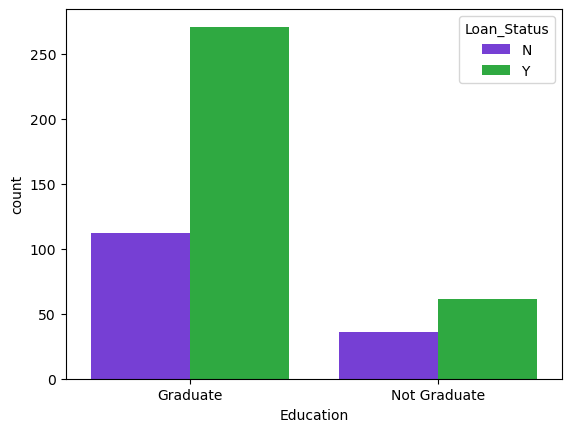

In [16]:
sns.countplot(x='Education',hue='Loan_Status',data=refurbished_data, palette=['#7026ED',"#1BBD32"])

<AxesSubplot:xlabel='Married', ylabel='count'>

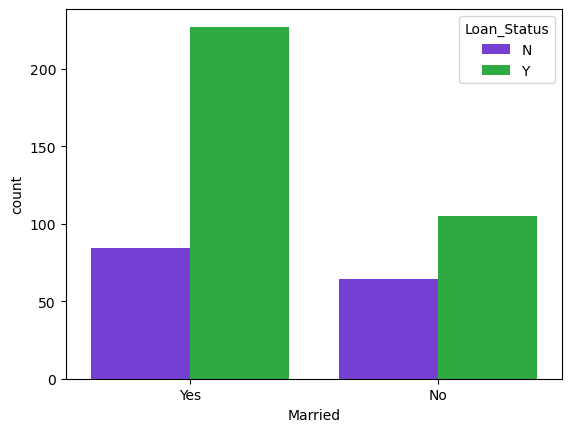

In [15]:
sns.countplot(x='Married',hue='Loan_Status',data=refurbished_data, palette=['#7026ED',"#1BBD32"])

In [18]:
refurbished_data.replace({'Married':{'No':0,'Yes':1},
                      'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0},
                      'Loan_Status':{'Y':1, 'N':0},
                      'Dependents':{'0':0, '1':1, '2':2, "3+":4}
                     },inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2764\262042452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refurbished_data.replace({'Married':{'No':0,'Yes':1},


In [19]:
refurbished_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
X = refurbished_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = refurbished_data['Loan_Status']

In [21]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=2)

In [25]:
support_vector_machine = svm.SVC(kernel='linear')
support_vector_machine.fit(X_train,Y_train)

SVC(kernel='linear')

In [26]:
X_train_prediction = support_vector_machine.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [27]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7941176470588235


In [29]:
X_test_prediction = support_vector_machine.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [30]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8472222222222222


In [32]:
print(support_vector_machine.predict([[1,1,1,1,0,5000,1500,500,360,1.0,2]]))

[1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
